In [1]:
import pandas
import sqlite3
import matplotlib.pyplot as plt

In [2]:
# For some reason, if this is in the same call as the import command, it doesn't work.
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [3]:
plt.rcParams["figure.max_open_warning"] = 200

In [4]:
virii=pandas.read_csv('20181212-USC-CHLA-NBL-unmapped-viral-align-virii_details.csv', sep="\t", header=None, 
                      names=["accession","description"],
                      index_col=["accession"])
virii.head()

,description
accession,
NC_000898.1,"Human herpesvirus 6B, complete genome"
NC_001664.4,"Human betaherpesvirus 6A, variant A DNA, compl..."
NC_001710.1,"GB virus C/Hepatitis G virus, complete genome"
NC_001716.2,"Human herpesvirus 7, complete genome"
NC_008168.1,"Choristoneura fumiferana granulovirus, complet..."


In [5]:
conn = sqlite3.connect("20181212-USC-CHLA-NBL-unmapped-viral-align-viral_mapped_unmapped.sqlite3")
df = pandas.read_sql_query("SELECT * FROM subjects", conn)
df.head()

,subject,unmapped,NC_001710_1,NC_001710_1_unmapped,uncommon_NC_001710_1,uncommon_NC_001710_1_unmapped,NC_001716_2,NC_001716_2_unmapped,uncommon_NC_001716_2,uncommon_NC_001716_2_unmapped,...,uncommon_NC_001664_4,uncommon_NC_001664_4_unmapped,NC_000898_1,NC_000898_1_unmapped,uncommon_NC_000898_1,uncommon_NC_000898_1_unmapped,NC_008168_1,NC_008168_1_unmapped,uncommon_NC_008168_1,uncommon_NC_008168_1_unmapped
0,080217_S10,170120,544,0.003198,0,0.0,9,0.000053,0,0.0,...,0,0.0,9,0.000053,0,0.0,0,0.000000,0,0.0
1,080217_S11,247536,168,0.000679,0,0.0,12,0.000048,0,0.0,...,0,0.0,12,0.000048,0,0.0,0,0.000000,0,0.0
2,080217_S12,257484,63,0.000245,0,0.0,6,0.000023,0,0.0,...,0,0.0,8,0.000031,0,0.0,7,0.000027,0,0.0
3,080217_S13,558648,0,0.000000,0,0.0,8,0.000014,0,0.0,...,0,0.0,6,0.000011,0,0.0,1,0.000002,0,0.0
4,080217_S14,157560,0,0.000000,0,0.0,15,0.000095,0,0.0,...,0,0.0,15,0.000095,0,0.0,0,0.000000,0,0.0


In [6]:
len(df)

955

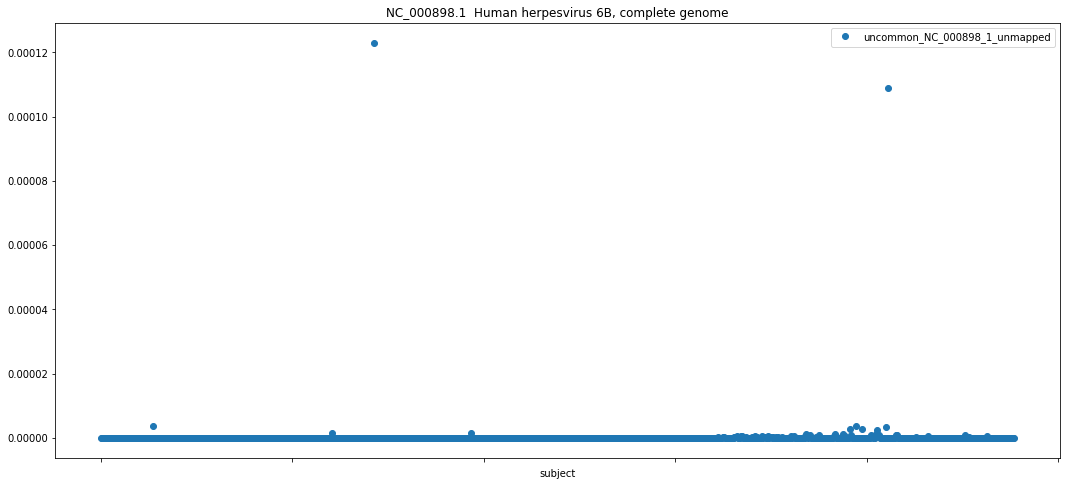

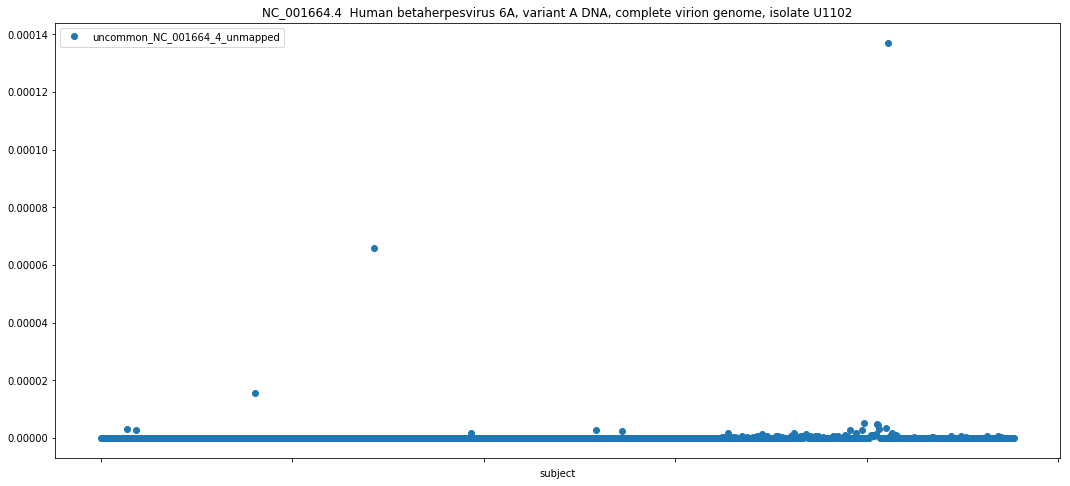

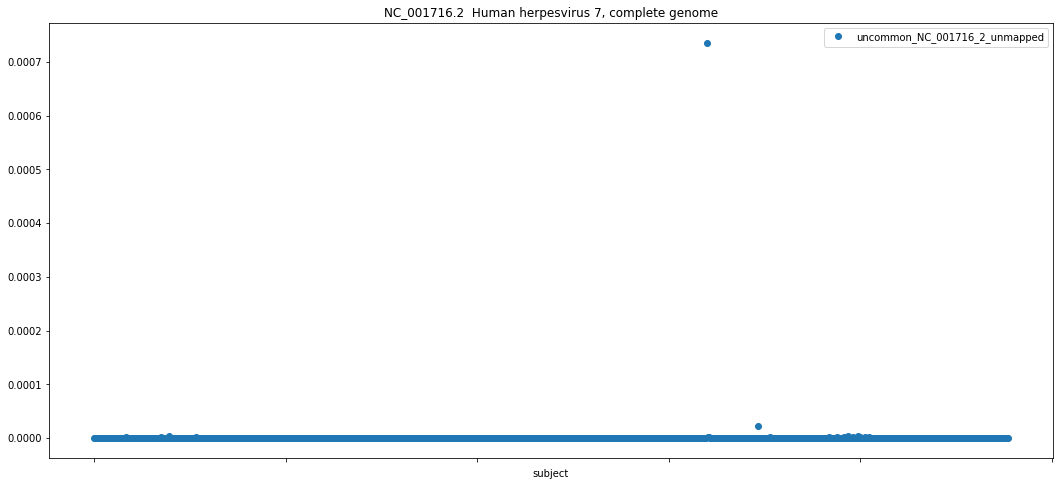

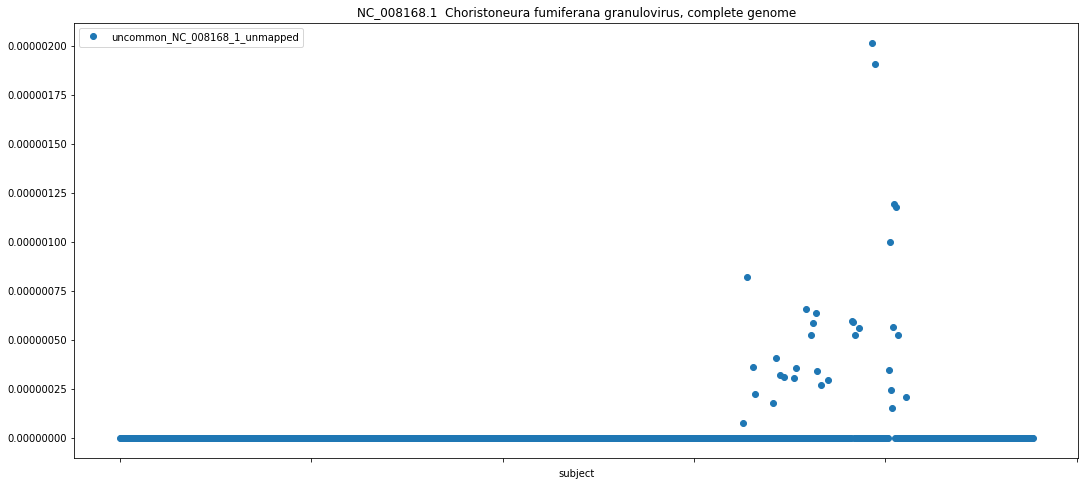

In [7]:
for accession, row in virii.iterrows():
    tmp=accession.replace(".", "_")
    if( df['uncommon_'+tmp+'_unmapped'].max() > 0 ):     
        df.plot( title=accession + "  " + row['description'][:100],marker='o',linewidth=0,
                    logy=False,x='subject',y='uncommon_'+tmp+'_unmapped')

In [8]:
for accession, row in virii.iterrows():
    tmp=accession.replace(".", "_")
    if( df['uncommon_'+tmp+'_unmapped'].max() > 0 ):
        mean=df['uncommon_'+tmp+'_unmapped'].mean()
        std=df['uncommon_'+tmp+'_unmapped'].std()
        print(accession + "  " + row['description'] + "\nmean " + str(mean) + "\tstddev " + str(std))
        s=df[ df['uncommon_'+tmp+'_unmapped'] > ( mean + std )]
        print(len(s))
        print(s['subject'].tolist())
        print()

NC_000898.1  Human herpesvirus 6B, complete genome
mean 2.9795977084125323e-07	stddev 5.3191467477673965e-06
2
['NB131', '108']

NC_001664.4  Human betaherpesvirus 6A, variant A DNA, complete virion genome, isolate U1102
mean 3.11388511406799e-07	stddev 4.959906304986803e-06
4
['NB007', 'NB131', 'SRR1559186', '108']

NC_001716.2  Human herpesvirus 7, complete genome
mean 8.468715025843402e-07	stddev 2.382236289314916e-05
1
['NB495']

NC_008168.1  Choristoneura fumiferana granulovirus, complete genome
mean 1.916242808601598e-08	stddev 1.3156015496423713e-07
31
['SRR1559042', 'SRR1559049', 'SRR1559051', 'SRR1559070', 'SRR1559073', 'SRR1559077', 'SRR1559081', 'SRR1559092', 'SRR1559094', 'SRR1559105', 'SRR1559110', 'SRR1559112', 'SRR1559115', 'SRR1559116', 'SRR1559121', 'SRR1559128', 'SRR1559153', 'SRR1559154', 'SRR1559156', 'SRR1559160', 'SRR1559175', 'SRR1559178', 'SRR391604', 'SRR391605', 'SRR391606', 'SRR391607', 'SRR391608', 'SRR391609', 'SRR391611', 'SRR391613', '108']

